Modelo para predecir de abandono de clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv("./archivos/BankChurners.csv")

*INTRODUCCION*

Lo que se intentara probar en esta etapa seran diferentes hipótesis planteadas sobre un dataset de los registros de un banco y sus clientes que poseen tarjeta de credito.

Los datos cuentan con informacion relacionada a los diferentes clientes. A continuacion encontraremos una lista con todas las columnas y el significado de cada una

CLIENTNUM Client number. Unique identifier for the customer holding the account

Attrition_FlagInternal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age Demographic variable - Customer's Age in Years

Gender Demographic variable - M=Male, F=Female

Dependent_count Demographic variable - Number of dependents

Education_Level Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status Demographic variable - Married, Single, Divorced, Unknown

Income_Category Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, $60K - 80K, 80K-120K, > 120K, Unknown)

Card_Category Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book Period of relationship with bank

Total_Relationship_Count Total no. of products held by the customer

Months_Inactive_12_mon No. of months inactive in the last 12 months

Contacts_Count_12_mon No. of Contacts in the last 12 months

Credit_Limit Credit Limit on the Credit Card

Total_Revolving_Bal Total Revolving Balance on the Credit Card

Avg_Open_To_Buy Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt Total Transaction Amount (Last 12 months)

Total_Trans_Ct Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio Average Card Utilization Ratio

# DATOS

In [3]:
bank_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


La fuente de donde se obtuvo el dataset recomienda eliminar las ultimas dos columnas, por lo que se procede a hacer un drop de las mismas

In [4]:
bank_df = bank_df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Se puede observar, que el dataset cuenta con 21 columnas, de las cuales 15 son numericas y 6 son objetos, es decir categoricas.

## Analisis exploratorio

In [6]:
columns_name = list(bank_df.columns.values)  #  Se arma una lista con los nombres de las columnas para usarla a continuacion

Se realiza una serie de histogramas para cada una de las columnas con el objetivo de ver si se puede apreciar algun patrón interesante a ser analizado. Como el objetivo de este analisis es predecir el Attrition_Flag se realizo una agrupacon por esta categoria.

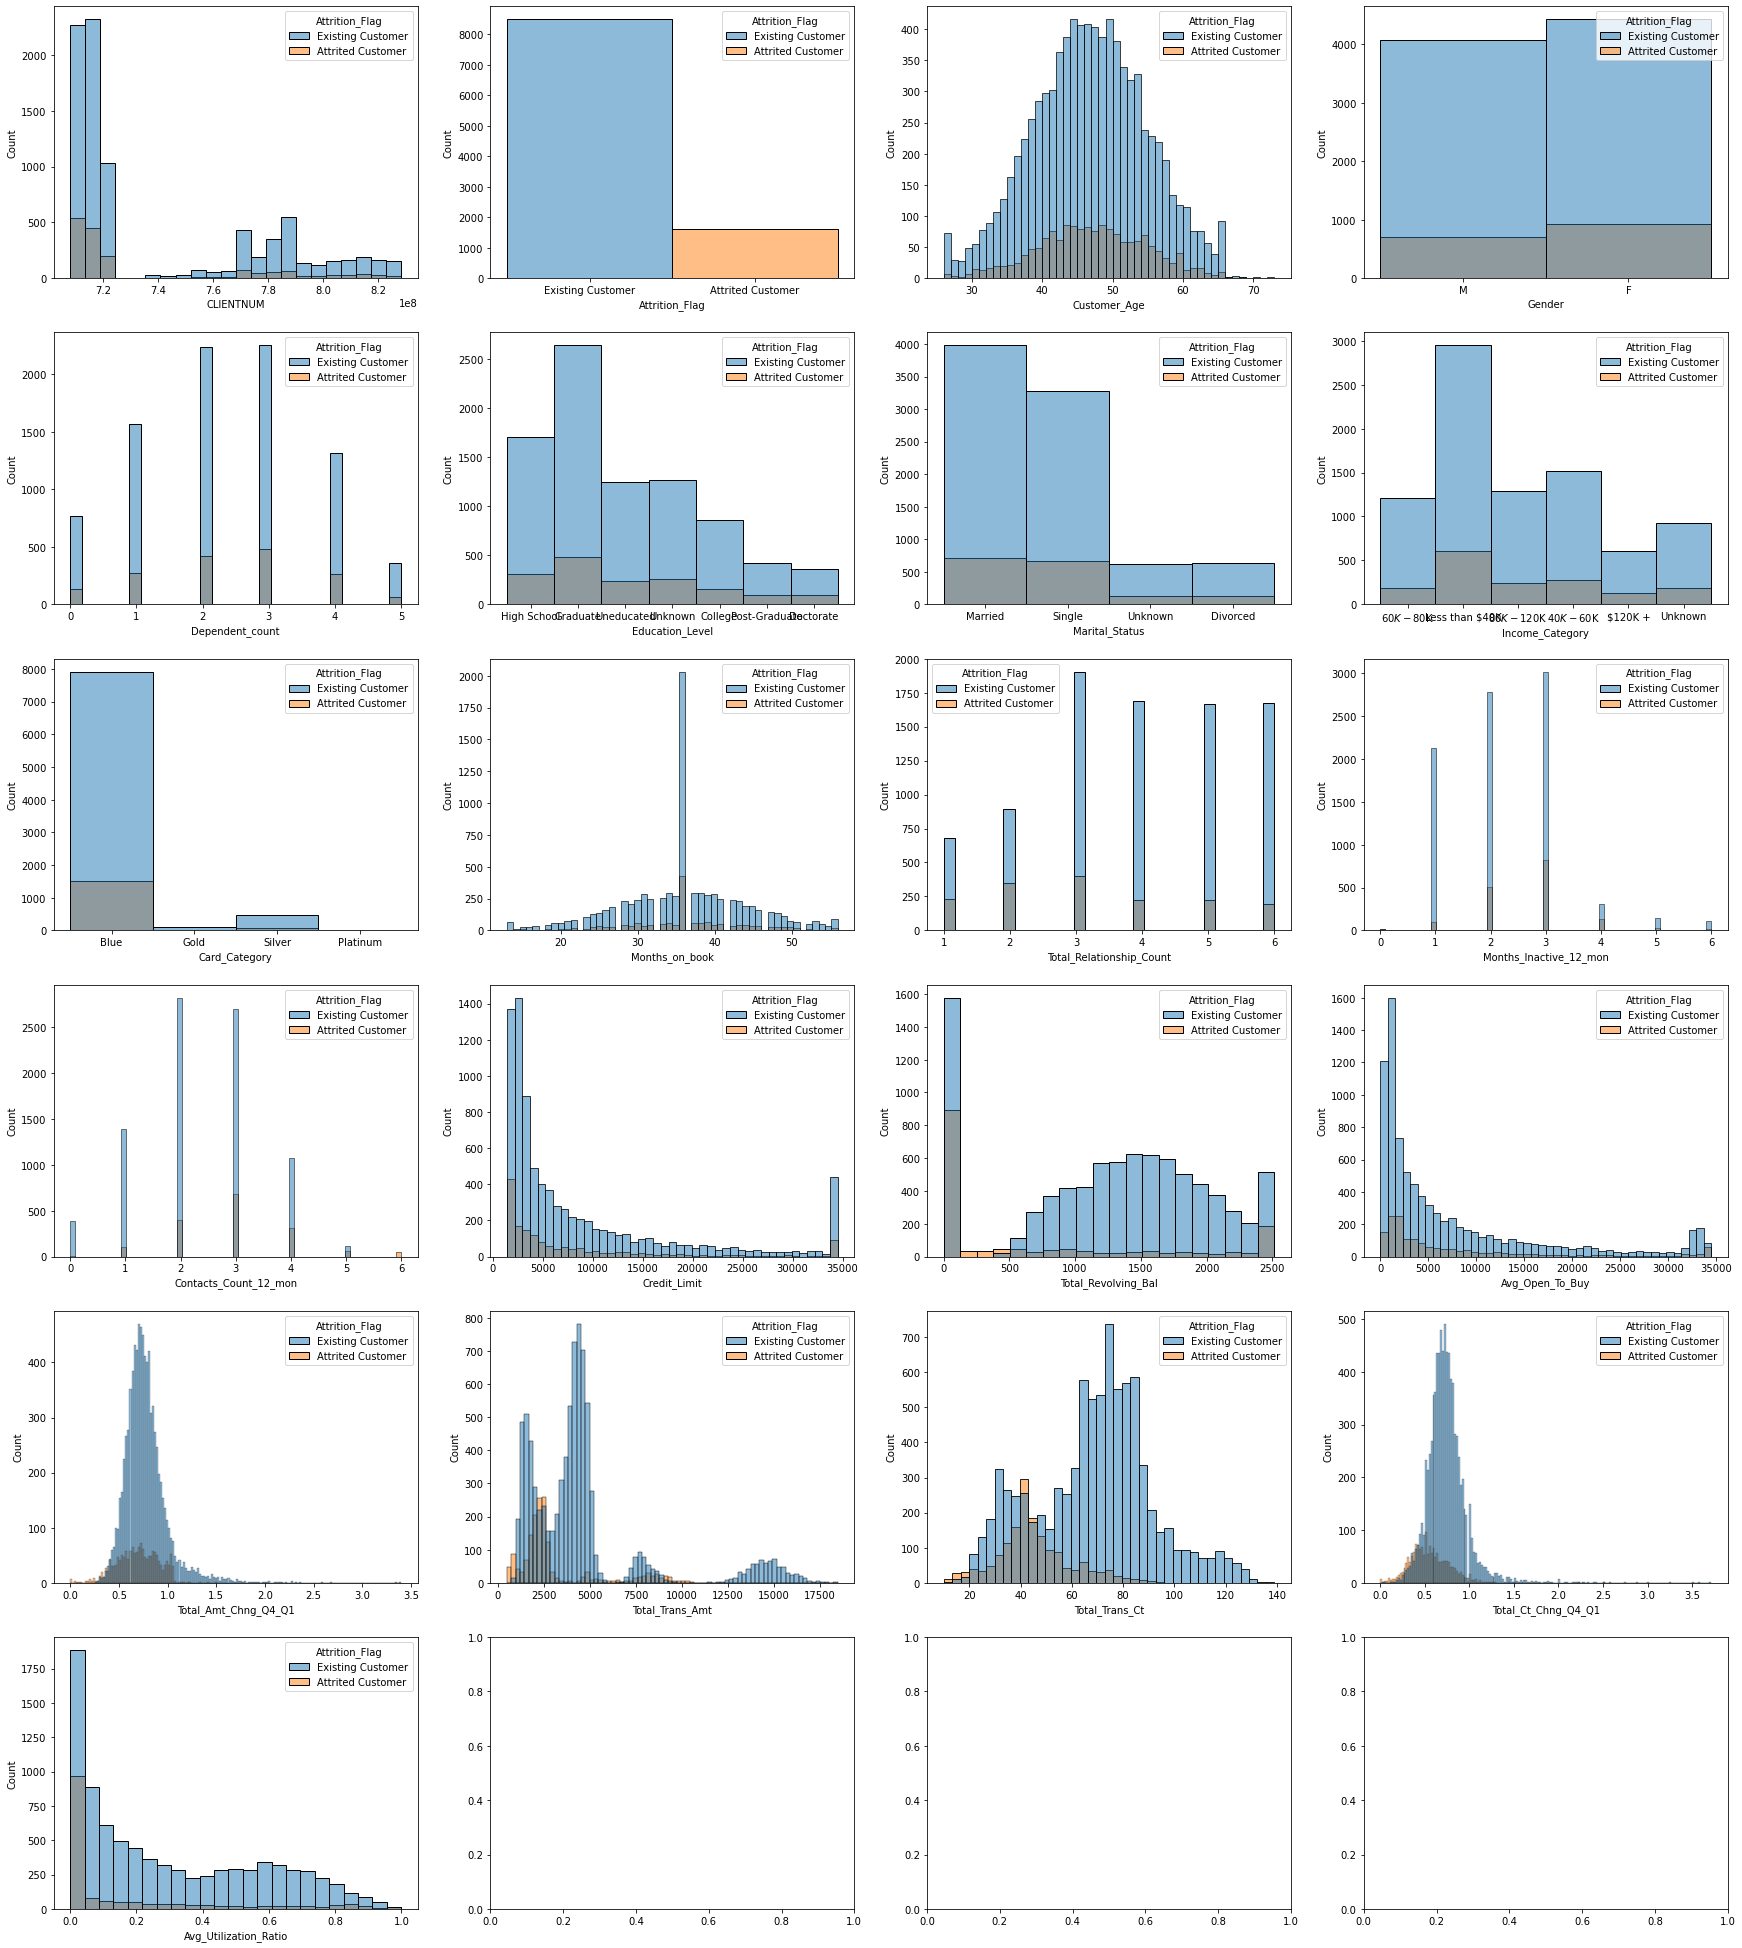

In [7]:
fig , axes = plt.subplots(6,4,figsize = (30,35))
i = 0
for fil in range(6):
  for col in range(4):
    if i <=20:                                    #  esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

## HIPÓTESIS

En funcion de estos gráficos, podemos plantear algunas hipotesis. Para ello, vamos a comenzar con aquellos en los que se aprecie a simple vista una diferencia en el comportamiento de clientes activos y clientes retirados

Hipótesis 1

H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

In [8]:
Retirados = bank_df['Attrition_Flag'] == "Attrited Customer" 
Activos = bank_df['Attrition_Flag'] != "Attrited Customer" 
print("Media de montos de transferencia de clientes ACTIVOS" ,bank_df[Activos].Total_Trans_Amt.mean())  # Mediana de clientes activos
print("Media de montos de transferencias de clientes INACTIVOS" ,bank_df[Retirados].Total_Trans_Amt.mean()) # Mediana de clientes retirados

Media de montos de transferencia de clientes ACTIVOS 4654.655882352941
Media de montos de transferencias de clientes INACTIVOS 3095.025814382299


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H1 y se validaria la H0.

En función de esto, se procede a analizar mas a detalle. Para ello se realizan 2 graficos, un histograma y un boxplot con el objetivo de determinar que tipo de distribucion siguen los datos y para determinar la existencia de outliers. En caso de que se encuentren outliers la media no es una medida muy representativa, por lo que se analizara con la mediana.

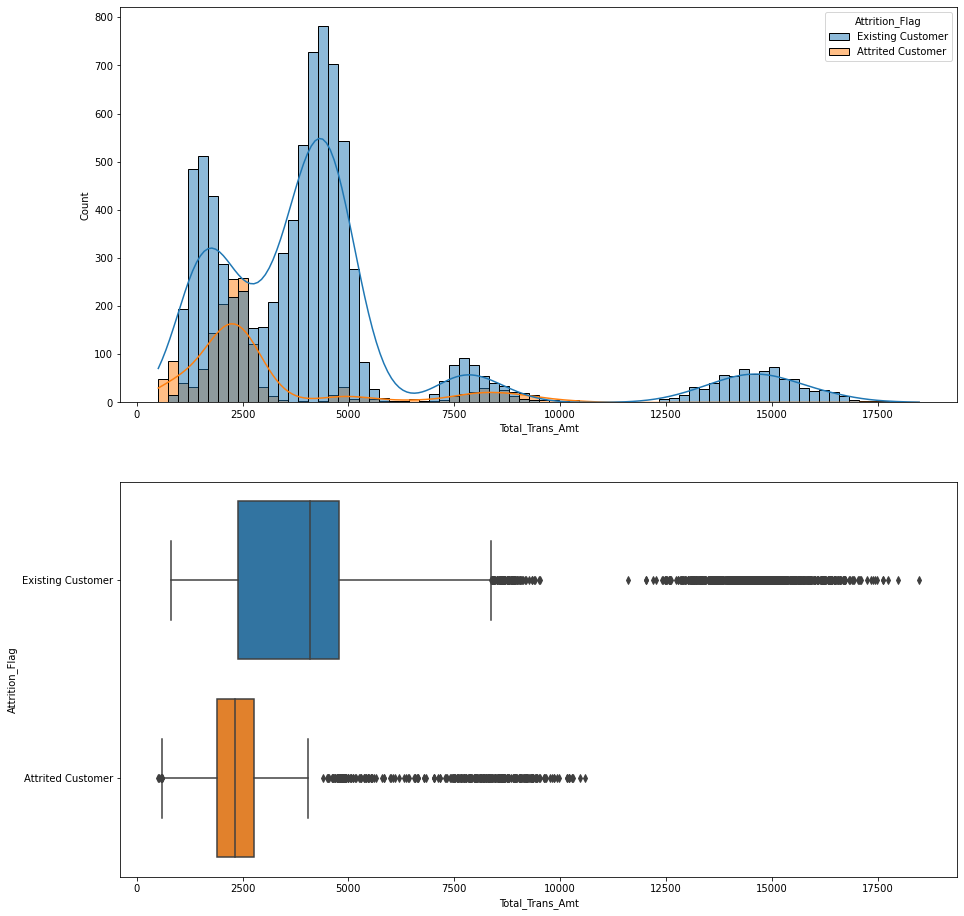

In [9]:
fig,axes = plt.subplots(2,1,figsize=(15,16))
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Amt",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Amt",
            y = "Attrition_Flag"
            )
plt.show()

Se observa gran cantidad de outliers, por lo que se analizara la mediana.

In [10]:
print("Mediana de montos de transferencia de clientes ACTIVOS" ,bank_df[Activos].Total_Trans_Amt.median())  # Mediana de clientes activos
print("Mediana de montos de transferencias de clientes INACTIVOS" ,bank_df[Retirados].Total_Trans_Amt.median()) # Mediana de clientes retirados

Mediana de montos de transferencia de clientes ACTIVOS 4100.0
Mediana de montos de transferencias de clientes INACTIVOS 2329.0


In [11]:
bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.median() # LO MISMO PERO EN UNA SOLA LINEA

2329.0

Ahora se calculan los Q1 y Q3 para sacar el IQR 
Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [12]:
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  1903.5
Q3R =  2772.0
IQR Retirados =  868.5
Q1A =  2384.75
Q3A =  4781.25
IQR Activos =  2396.5


Podemos observar que los montos de las transferencias realizadas por clientes activos se concentran entre los 2384 y 4781 USD. Mientras que los montos de las transferencias realizadas por clientes retirados se encuentran entre los 1903 y 2772 USD

### Hipótesis 2


H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **igual** para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **diferente** para clientes activos y retirados

In [13]:
print("Media de cantidad de transferencia de clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.mean())
print("Media de cantidad de transferencias de clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.mean())

Media de cantidad de transferencia de clientes ACTIVOS 68.67258823529411
Media de cantidad de transferencias de clientes INACTIVOS 44.93362015980332


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H2 y se validaria la H0.

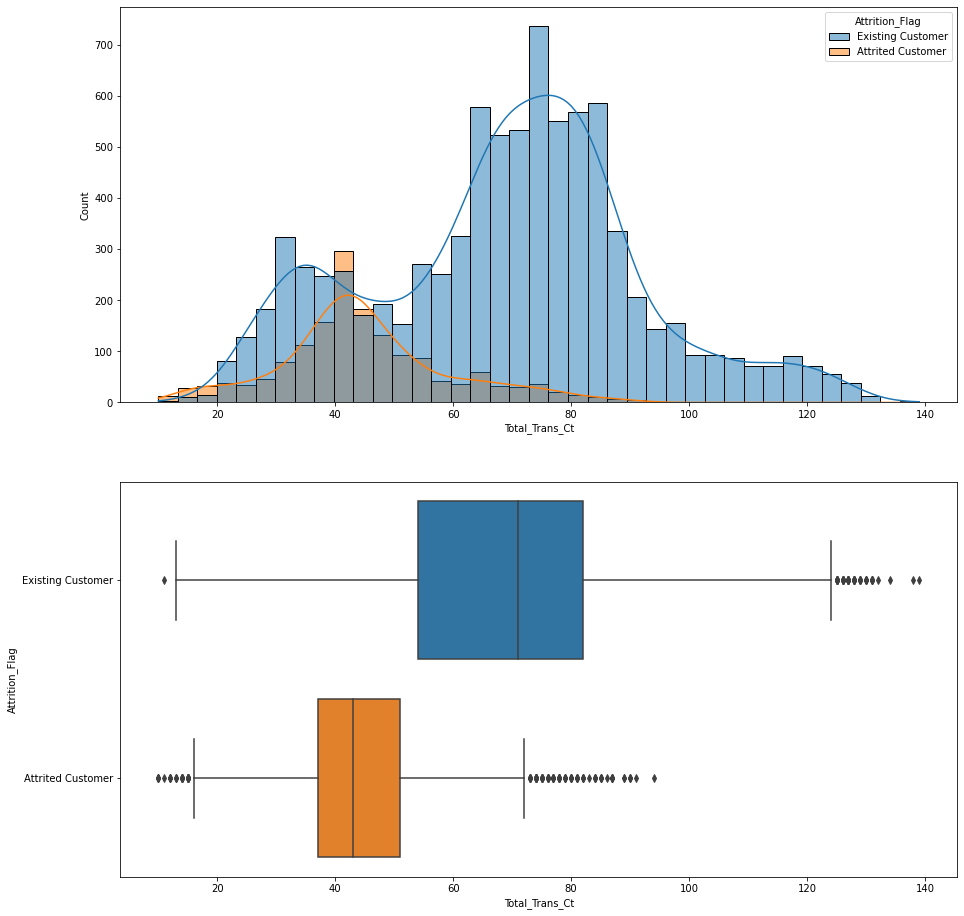

In [14]:
fig,axes = plt.subplots(2,1,figsize=(15,16))
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Ct",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Ct",
            y = "Attrition_Flag"
            )
plt.show()

In [15]:
print("Mediana de cantidad de transferencia de clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.median())  # Mediana de clientes activos
print("Mediana de cantidad de transferencias de clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.median()) # Mediana de clientes retirados

Mediana de cantidad de transferencia de clientes ACTIVOS 71.0
Mediana de cantidad de transferencias de clientes INACTIVOS 43.0


In [16]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  37.0
Q3R =  51.0
IQR Retirados =  14.0
Q1A =  54.0
Q3A =  82.0
IQR Activos =  28.0


Podemos observar que la cantiad de transferencias realizada por clientes activos se encunentra entre 54 y 82. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 37 y 51.

### Hipótesis 3

H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es **igual** para clientes activos y retirados 

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es **diferente** para clientes activos y retirados 

In [17]:
print("Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.mean())
print("Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.mean())

Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS 0.7424341176470571
Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS 0.5543859864781803


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H3 y se validaria la H0.

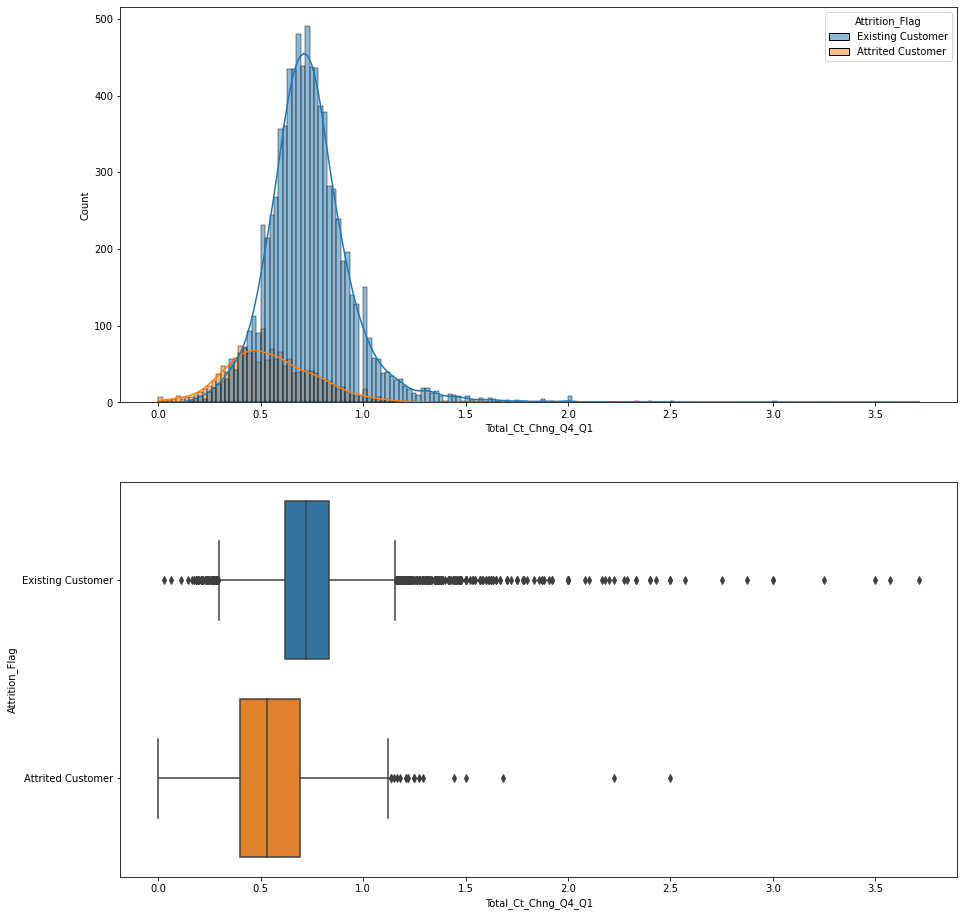

In [18]:
fig,axes = plt.subplots(2,1,figsize=(15,16))
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Ct_Chng_Q4_Q1",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Ct_Chng_Q4_Q1",
            y = "Attrition_Flag"
            )
plt.show()

In [19]:
print("Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.median())
print("Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.median())

Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS 0.721
Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS 0.531


In [20]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  0.4
Q3R =  0.692
IQR Retirados =  0.2919999999999999
Q1A =  0.617
Q3A =  0.833
IQR Activos =  0.21599999999999997


Podemos observar que la variación de la cantidad de transferencias realizadas por clientes activos se encuentra entre 0,61 y 0,833. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 0,4 y 0,692..

## Correlación de variables

Se procede a realizar una matriz de correlación para poder determinar si existe o no una relación entre las diferentes variables

Para evitar confusion en los datos, se hace la matriz de correlacion pero con los valores absoltuos. De esta forma, todos los coeficientes seran positivos.

In [21]:
bank_df.corr().abs()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,0.019692,0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,0.122254,0.788912,0.010931,0.054361,0.018452,0.002476,0.014780,0.001151,0.062042,0.046446,0.067097,0.012143,0.007114
Dependent_count,0.006772,0.122254,1.000000,0.103062,0.039076,0.010768,0.040505,0.068065,0.002688,0.068291,0.035439,0.025046,0.049912,0.011087,0.037135
Months_on_book,0.134588,0.788912,0.103062,1.000000,0.009203,0.074164,0.010774,0.007507,0.008623,0.006732,0.048959,0.038591,0.049819,0.014072,0.007541
Total_Relationship_Count,0.006907,0.010931,0.039076,0.009203,1.000000,0.003675,0.055203,0.071386,0.013726,0.072601,0.050119,0.347229,0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,0.010768,0.074164,0.003675,1.000000,0.029493,0.020394,0.042210,0.016605,0.032247,0.036982,0.042787,0.038989,0.007503
Contacts_Count_12_mon,0.005694,0.018452,0.040505,0.010774,0.055203,0.029493,1.000000,0.020817,0.053913,0.025646,0.024445,0.112774,0.152213,0.094997,0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,0.071386,0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,0.002020,0.482965
Total_Revolving_Bal,0.000825,0.014780,0.002688,0.008623,0.013726,0.042210,0.053913,0.042493,1.000000,0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,0.072601,0.016605,0.025646,0.995981,0.047167,1.000000,0.007595,0.165923,0.070885,0.010076,0.538808


Podemos observar que la matriz de correlacion solo se calcula sobre valores numericos. Los valores categoricos fueron quitados de los datos de forma automatica.

Visualmente, es dificil determinar si existe o no una relación entre las variables, por lo que se procede a graficarla.

<AxesSubplot:>

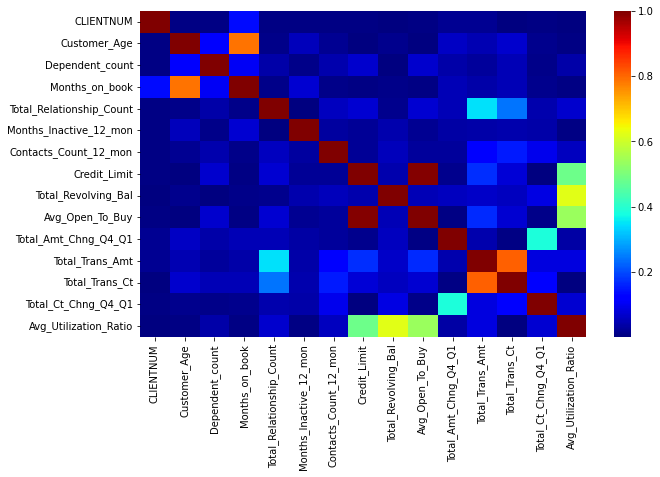

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=bank_df.corr().abs(), cmap='jet')

In [23]:
bank_df.corr().abs().unstack()

CLIENTNUM              CLIENTNUM                   1.000000
                       Customer_Age                0.007613
                       Dependent_count             0.006772
                       Months_on_book              0.134588
                       Total_Relationship_Count    0.006907
                                                     ...   
Avg_Utilization_Ratio  Total_Amt_Chng_Q4_Q1        0.035235
                       Total_Trans_Amt             0.083034
                       Total_Trans_Ct              0.002838
                       Total_Ct_Chng_Q4_Q1         0.074143
                       Avg_Utilization_Ratio       1.000000
Length: 225, dtype: float64

In [24]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

Tal y como se planteo unos pasos mas arriba, tenemos valores categoricos o del tipo "object" por lo que no podremos sacar mayores conclusiones sin antes quitarlos.

In [25]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [26]:
df = bank_df.drop(columns=['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag'])   # Aqui quitamos todas las columnas categoricas

In [27]:
df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [28]:
parejas(df)

{('Avg_Open_To_Buy', 'Avg_Open_To_Buy'),
 ('Avg_Open_To_Buy', 'CLIENTNUM'),
 ('Avg_Open_To_Buy', 'Contacts_Count_12_mon'),
 ('Avg_Open_To_Buy', 'Credit_Limit'),
 ('Avg_Open_To_Buy', 'Customer_Age'),
 ('Avg_Open_To_Buy', 'Dependent_count'),
 ('Avg_Open_To_Buy', 'Months_Inactive_12_mon'),
 ('Avg_Open_To_Buy', 'Months_on_book'),
 ('Avg_Open_To_Buy', 'Total_Relationship_Count'),
 ('Avg_Open_To_Buy', 'Total_Revolving_Bal'),
 ('Avg_Utilization_Ratio', 'Avg_Open_To_Buy'),
 ('Avg_Utilization_Ratio', 'Avg_Utilization_Ratio'),
 ('Avg_Utilization_Ratio', 'CLIENTNUM'),
 ('Avg_Utilization_Ratio', 'Contacts_Count_12_mon'),
 ('Avg_Utilization_Ratio', 'Credit_Limit'),
 ('Avg_Utilization_Ratio', 'Customer_Age'),
 ('Avg_Utilization_Ratio', 'Dependent_count'),
 ('Avg_Utilization_Ratio', 'Months_Inactive_12_mon'),
 ('Avg_Utilization_Ratio', 'Months_on_book'),
 ('Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1'),
 ('Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1'),
 ('Avg_Utilization_Ratio', 'Total_Relationshi

In [29]:
correlaciones(df,10)

Credit_Limit              Avg_Open_To_Buy          0.995981
Total_Trans_Amt           Total_Trans_Ct           0.807192
Customer_Age              Months_on_book           0.788912
Total_Revolving_Bal       Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy           Avg_Utilization_Ratio    0.538808
Credit_Limit              Avg_Utilization_Ratio    0.482965
Total_Amt_Chng_Q4_Q1      Total_Ct_Chng_Q4_Q1      0.384189
Total_Relationship_Count  Total_Trans_Amt          0.347229
                          Total_Trans_Ct           0.241891
Credit_Limit              Total_Trans_Amt          0.171730
dtype: float64

Las unicas relaciones que podemos notar como importantes gracias a la matriz son las siguientes

Credit_Limit / Avg_Open_To_Buy = 0.995981

Total_Trans_Amt / Total_Trans_Ct = 0.807192

Customer_Age / Months_on_book = 0.788912

Total_Revolving_Bal / Avg_Utilization_Ratio = 0.624022